# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1) #fetching the dataset
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [17]:
import numpy as np
def apply_svd_custom(X_train, X_test, n_components):
    """
    Apply Singular Value Decomposition (SVD) on the training data and reduce its dimensionality.
    Then apply the same transformation to the test data.

    Parameters:
    X_train (numpy array): Training data of shape (n_samples, n_features)
    X_test (numpy array): Test data of shape (n_samples, n_features)
    n_components (int): Number of components to keep

    Returns:
    X_train_reduced (numpy array): Reduced training data of shape (n_samples, n_components)
    X_test_reduced (numpy array): Reduced test data of shape (n_samples, n_components)
    """

    # Step 1: Compute A^T A
    A = X_train
    ATA = np.dot(A.T, A)  # Compute A^T A, shape (n, n)

    # Step 2: Compute the eigenvalues and eigenvectors of A^T A
    eigvals, V = np.linalg.eig(ATA)  # V contains eigenvectors (right singular vectors)

    # Step 3: Sort eigenvectors by eigenvalue magnitude (largest first)
    sorted_indices = np.argsort(eigvals)[::-1]  # Indices to sort by descending eigenvalue
    eigvals = eigvals[sorted_indices]
    V = V[:, sorted_indices]

    # Step 4: Compute the singular values (square roots of the eigenvalues)
    S = np.sqrt(np.abs(eigvals))

    # Step 5: Limit the number of components if n_components is specified
    if n_components is not None:
        S = S[:n_components]
        V = V[:, :n_components]

    # Step 6: Compute U = A V S^(-1)
    # Sigma_inv = np.diag(1 / (S + 1e-10))  # Inverse of singular values (for computing U), adding small epsilon to avoid division by zero
    # U = np.dot(A, np.dot(V, Sigma_inv))  # Compute U (left singular vectors)

    # Step 6: Compute U = A V / S
    U = np.dot(A, V)
    U = U / (S+ 1e-10)  # Normalize U by singular values

    # Step 7: Project the test data into the same reduced space
    X_train_reduced = np.real(np.dot(U, np.diag(S)))  # Reduced training data
    X_test_reduced = np.real(np.dot(X_test, V))  # Reduced test data using the right singular vectors

    return X_train_reduced, X_test_reduced, V

## Part 3: Train Logistic Regression and Measure Performance

In [4]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [18]:
svd_components = [784, 300, 100, 50, 25, 5]  # You need to decide what number to search...

# Store the results
results = []

# Capture the singular vectors V for visualization
V_for_visualization = None  # Initialize variable to store V

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...

    X_train_svd, X_test_svd, V = apply_svd_custom(X_train, X_test, n_components)

    # Store V for visualization when n_components is large enough to get meaningful singular vectors
    if n_components >= 5:
        V_for_visualization = V

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    # Store the results in a dictionary
    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

Training models with different levels of SVD preprocessing...
Applying custom SVD with 784 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9209, Training time: 819.7935 seconds
Applying custom SVD with 300 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 300, Accuracy: 0.9205, Training time: 217.5556 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 50.7114 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9085, Training time: 14.0647 seconds
Applying custom SVD with 25 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 25, Accuracy: 0.8854, Training time: 2.8578 seconds
Applying custom SVD with 5 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 5, Accuracy: 0.6659, Training time: 0.7639 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


Visualizing top 5 singular vectors...


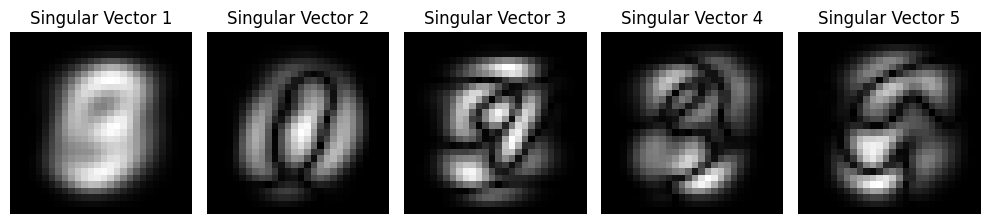

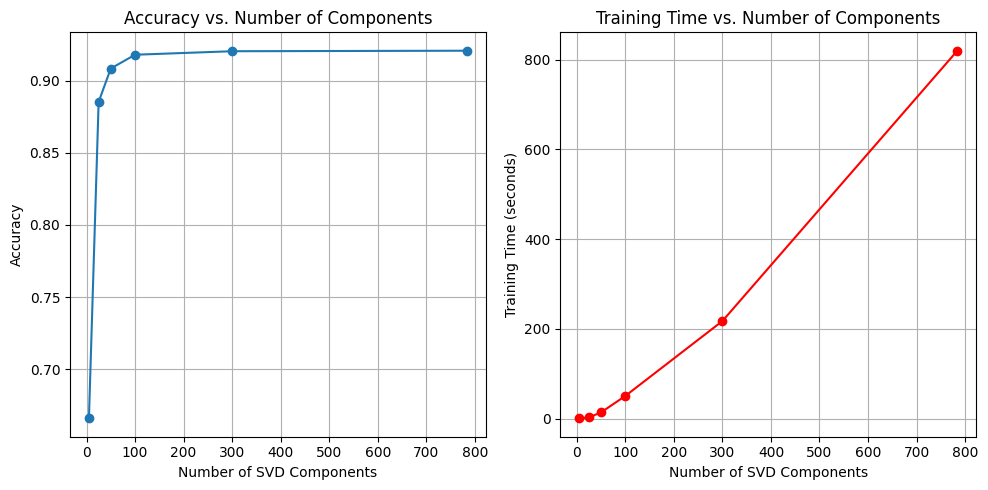

In [20]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
def visualize_top_singular_vectors(V, n_vectors=5):
    """
    Visualize the top n singular vectors by reshaping them into 28x28 images.

    Parameters:
    V (numpy array): The right singular vectors (V matrix from SVD).
    n_vectors (int): Number of singular vectors to visualize.
    """
    plt.figure(figsize=(10, 5))

    for i in range(n_vectors):
        # Reshape the ith singular vector (length 784) into a 28x28 image
        singular_vector_image = V[:, i].reshape(28, 28)
        singular_vector_image = np.abs(singular_vector_image)

        # Plot the singular vector as an image
        plt.subplot(1, n_vectors, i + 1)
        plt.imshow(singular_vector_image, cmap='gray')
        plt.title(f"Singular Vector {i+1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example: V is the right singular vectors matrix from SVD (shape: 784 x 784)
# Call the function to visualize the top 5 singular vectors
if V_for_visualization is not None:
    print("Visualizing top 5 singular vectors...")
    visualize_top_singular_vectors(V_for_visualization, n_vectors=5)

def plot_accuracy_and_time(results):
  # Extract components, accuracies, and training times from the results
  components = [result['n_components'] for result in results]
  accuracies = [result['accuracy'] for result in results]
  times = [result['training_time'] for result in results]

  # Plot accuracy vs. number of components
  plt.figure(figsize=(10,5))

  plt.subplot(1, 2, 1)
  plt.plot(components, accuracies, marker='o', label='Accuracy')
  plt.xlabel('Number of SVD Components')
  plt.ylabel('Accuracy')
  plt.title('Accuracy vs. Number of Components')
  plt.grid(True)

  # Plot training time vs. number of components
  plt.subplot(1, 2, 2)
  plt.plot(components, times, marker='o', label='Training Time', color='red')
  plt.xlabel('Number of SVD Components')
  plt.ylabel('Training Time (seconds)')
  plt.title('Training Time vs. Number of Components')
  plt.grid(True)

  plt.tight_layout()
  plt.show()

plot_accuracy_and_time(results)

## Part 6: Analyze / Conclusion

YOUR ANSWER:

We can observe that with increased number of components, the model performance improves at the cost of training efficiency due to the need for extra computational resources. Then to determine the optimal number of SVD components to use, we can see that based on the numerical results given by Part 4 as well as the graphic visualization from Part 5 that a SVD component value between 100-300 seems to optimize accuracy and time effeciancy. As shown by the two regression curves from Part 5, any value after 300 components does not appear to increase the accuracy by any substantial amount, yet will take a nearly exponential increase in training time. For instance, it seems that the accuracy with 300 SVD components is practically equivalent to the accuracy with 784 components, yet the training time nearly triples. Between 100 and 300 components, the accuracy is maximized to above 90% with one-third or less of required training time that is required with 784 components. Below 100 components, however, we start seeing a compromise in accuracy as the value starts to decrease exponentially. Therefore, to obtain maximal accuracy with minimal training time during dimensionality reduction with SVD, choosing between 100-300 SVD components would result in the best compromise.